In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(rc={
    'figure.figsize':(15, 10)
}, style="ticks", context="talk")


plt.style.use('dark_background')

# Project and Dataset Overview

## Marketing A/B Testing Dataset

Marketing companies aim to run successful campaigns, but the market is complex with multiple strategies that could potentially work. To make informed decisions, companies often conduct **A/B tests**. An A/B test is a randomized experimental process where two or more versions of a variable (e.g., a web page, page element, or banner) are shown to different segments of users simultaneously. This helps determine which version has the most significant impact and drives key business metrics.

### Goals of the Analysis:
The companies are interested in answering two main questions:
1. **Would the campaign be successful?**
2. **If the campaign was successful, how much of that success could be attributed to the ads?**

To address the second question, an A/B test is commonly conducted. Most users are exposed to ads (the experimental group), while a smaller portion (the control group) views a Public Service Announcement (PSA) or nothing, displayed in the same location as the ad would be.

### Objective of the Dataset:
The purpose of this dataset is to analyze the groups and determine:
- Whether the ads were successful.
- The potential revenue generated from the ads.
- Whether the observed differences between the experimental and control groups are statistically significant.

### Data Dictionary:
- **Index**: Row index.
- **user id**: Unique identifier for each user.
- **test group**: Indicates whether the person saw the advertisement ("ad") or only the public service announcement ("psa").
- **converted**: Indicates if a person bought the product (`True` if purchased, `False` otherwise).
- **total ads**: Number of ads seen by the user.
- **most ads day**: Day on which the user saw the highest number of ads.
- **most ads hour**: Hour of the day when the user saw the highest number of ads.





https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing

In [2]:
!kaggle datasets download -d faviovaz/marketing-ab-testing

Dataset URL: https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing
License(s): CC0-1.0
  0% 0.00/5.23M [00:00<?, ?B/s]
100% 5.23M/5.23M [00:00<00:00, 104MB/s]


In [3]:
!unzip /content/marketing-ab-testing.zip

Archive:  /content/marketing-ab-testing.zip
  inflating: marketing_AB.csv        


In [4]:
df=pd.read_csv('/content/marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [6]:
df.shape

(588101, 6)

In [7]:
df.isnull().sum()

,0
user id,0
test group,0
converted,0
total ads,0
most ads day,0
most ads hour,0


In [8]:
df.duplicated().sum()

0

In [9]:
df['user id'].nunique()

588101

In [10]:
df['user id'].nunique() == df.shape[0]

True

In [11]:
df['test group'].unique()

array(['ad', 'psa'], dtype=object)

In [12]:
df[df['test group'] == 'ad']

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


In [13]:
df[df['test group'] == 'psa']

,user id,test group,converted,total ads,most ads day,most ads hour
18,900681,psa,False,248,Saturday,19
38,905704,psa,False,27,Thursday,8
68,904595,psa,False,13,Tuesday,19
140,901904,psa,False,32,Wednesday,19
157,902234,psa,False,105,Tuesday,19
...,...,...,...,...,...,...
588052,900959,psa,False,16,Tuesday,22
588063,902828,psa,False,3,Tuesday,22
588066,914578,psa,False,1,Tuesday,22
588069,909042,psa,False,6,Tuesday,22


In [14]:
df.converted.value_counts()

,count
converted,
False,573258
True,14843


In [15]:
df.dtypes

,0
user id,int64
test group,object
converted,bool
total ads,int64
most ads day,object
most ads hour,int64


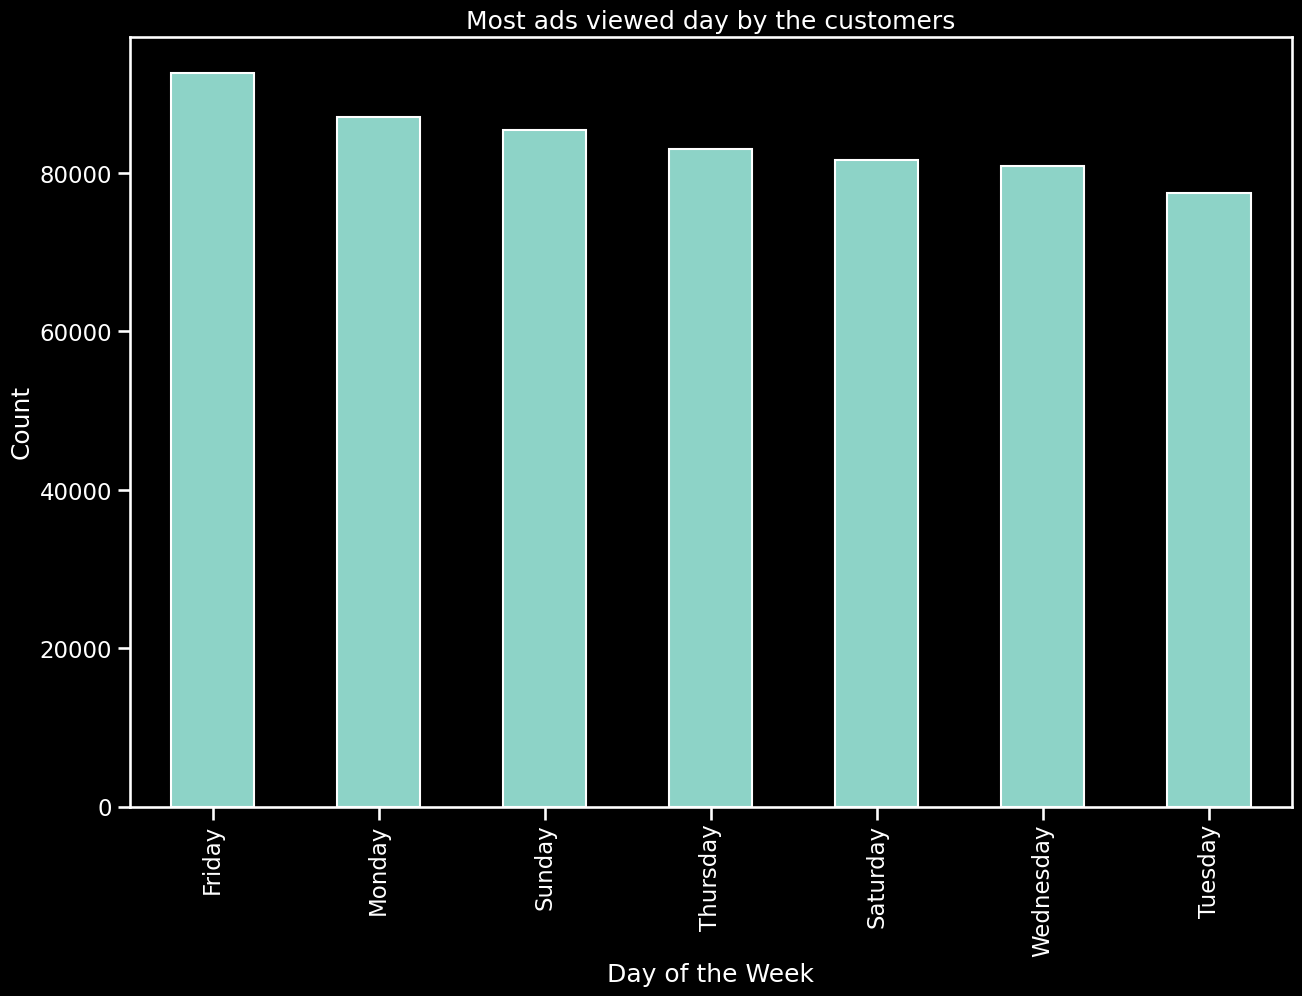

In [16]:
day_counts=df['most ads day'].value_counts().reset_index(name='day of week count')
day_counts.columns=['most ads day', 'day of week count']  # Rename columns for clarity
day_counts.plot(x='most ads day', y='day of week count', kind='bar', legend=False)
plt.title('Most ads viewed day by the customers')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

**Friday is the most ads viewed day**

In [17]:
# Total Purchase Rate

purchase=df[df['converted'] == True]['user id'].nunique()
total=df['user id'].nunique()

purchase_rate=round((purchase/total)*100, 2)
print(f"Purchase rate is: {purchase_rate}%")

Purchase rate is: 2.52%


In [18]:
# Purchase rate for Experimental (ad) and Control (psa) Group

def purchase_rate(test_group):
  group=df[df['test group'] == test_group]

  purchase=group[group['converted'] == True]['user id'].nunique()
  total=group['user id'].nunique()

  rate=round((purchase/total)*100, 2)
  return rate

In [19]:
purchase_rate_ad=purchase_rate(test_group='ad')
print(f"Purchase rate for experimental group: {purchase_rate_ad}%")

Purchase rate for experimental group: 2.55%


In [20]:
purchase_rate_psa=purchase_rate(test_group='psa')
print(f"Purchase rate for control group: {purchase_rate_psa}%")

Purchase rate for control group: 1.79%


In [21]:
print(f"Actual Difference Between the Experimental and the Control Group: {round(purchase_rate_ad-purchase_rate_psa, 2)}%\n")

if purchase_rate_ad>purchase_rate_psa:
  print(f"The purchase rate is higher for the Experimental group")

elif purchase_rate_ad<purchase_rate_psa:
  print(f"The purchase rate is higher for the Control group")

else:
  print(f"The purchase rate is equal for the Experimental and the Control group")

Actual Difference Between the Experimental and the Control Group: 0.76%

The purchase rate is higher for the Experimental group


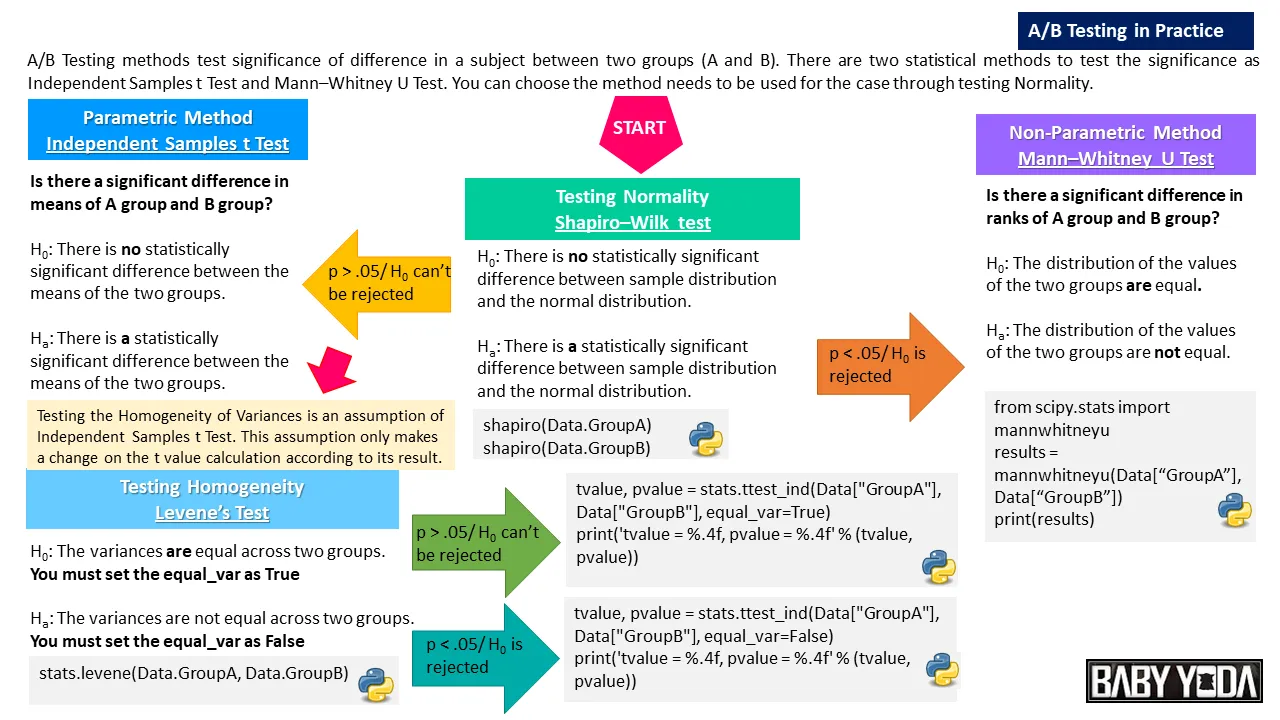

# A/B Test for Purchase Rate

## The Question:
Is the difference of purchase rate (LIFT) between the experimental and the control group significant or not?

### Hypotheses:
- **$H_0$ (Null Hypothesis)**: There is no relationship between the difference of purchase rate between the experimental and the control group.
- **$H_1$ (Alternative Hypothesis)**: There is a significant difference in the purchase rate between the experimental and the control group.

In [22]:
purchasers=df.groupby(['user id', 'test group'])['converted'].max().reset_index()
purchasers

,user id,test group,converted
0,900000,psa,False
1,900001,psa,False
2,900002,psa,False
3,900003,psa,False
4,900004,psa,False
...,...,...,...
588096,1654477,ad,False
588097,1654478,ad,False
588098,1654480,ad,False
588099,1654482,ad,False


In [23]:
purchasers=purchasers.pivot(index='user id', columns='test group', values='converted').reset_index()
purchasers

test group,user id,ad,psa
0,900000,NaN,False
1,900001,NaN,False
2,900002,NaN,False
3,900003,NaN,False
4,900004,NaN,False
...,...,...,...
588096,1654477,False,NaN
588097,1654478,False,NaN
588098,1654480,False,NaN
588099,1654482,False,NaN


### Lift Formula
The formula for calculating the lift is given by:

$$
\text{Lift} = \frac{\text{Experimental (Treatment) conversion rate} - \text{Control conversion rate}}{\text{Control conversion rate}}
$$



In [24]:
ad=purchasers['ad'].dropna()
psa=purchasers['psa'].dropna()

# Lift = (Experimental(Treatment) conversion rate - Control conversion rate) / Control conversion rate

lift=((np.mean(ad) - np.mean(psa))/np.mean(psa))*100

print(f"Lift: {round(lift, 2)}%")

Lift: 43.09%


In [25]:
from scipy.stats import ttest_ind

t_stats, p = ttest_ind(ad.astype(int), psa.astype(int))

print(f"T-statistics: {t_stats} and P-value: {p}\n")

if p<0.05:
  print(f"Reject the null hypothesis Ho as (p<0.05), There is a significant difference the between difference of purchase rate between the experimental and the control group")
else:
  print(f"Fail to reject the null hypothesis H1 as (p>0.05), There is no relationship between the difference of purchase rate between the experimental and the control group")

T-statistics: 7.3704059742856565 and P-value: 1.7033052627831632e-13

Reject the null hypothesis Ho as (p<0.05), There is a significant difference the between difference of purchase rate between the experimental and the control group


In [26]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


# A/B Test for Total Ads Seen and Purchase between the Experimental and Control Group

## The Question:
Is the difference of ad seen rate between the experimental and the control group significant or not?

### Hypotheses:
- **$H_0$ (Null Hypothesis)**: There is no relationship between the difference of ad seen rate between the experimental and the control group.
- **$H_1$ (Alternative Hypothesis)**: There is a significant difference in the ad seen rate between the experimental and the control group.

In [27]:
purchase_data_ad=df[(df['test group'] == 'ad') & (df['converted'] == True)]
purchase_data_ad.shape

(14423, 6)

In [28]:
purchase_data_psa=df[(df['test group'] == 'psa') & (df['converted'] == True)]
purchase_data_psa.shape

(420, 6)

In [29]:
np.round(purchase_data_ad.describe(), 2)

,user id,total ads,most ads hour
count,14423.00,14423.00,14423.00
mean,1323140.18,83.91,15.05
std,186799.33,87.50,4.46
min,1000044.00,1.00,0.00
25%,1165265.00,35.00,12.00
50%,1322815.00,64.00,15.00
75%,1482073.00,103.00,18.00
max,1654460.00,1778.00,23.00


In [30]:
np.round(purchase_data_psa.describe(), 2)

,user id,total ads,most ads hour
count,420.00,420.00,420.00
mean,911415.73,83.28,15.33
std,6649.99,85.87,3.78
min,900021.00,1.00,3.00
25%,905823.50,25.00,12.00
50%,911199.50,55.00,15.00
75%,916549.75,111.75,18.00
max,923488.00,563.00,23.00


In [31]:
ad_seen_rate_ad=purchase_data_ad['total ads'].mean()
ad_seen_rate_psa=purchase_data_psa['total ads'].mean()

print(f"Average Ad Seen for the Experimental Group: {round(ad_seen_rate_ad, 2)}\n")
print(f"Average Ad Seen for the Control Group: {round(ad_seen_rate_psa, 2)}\n")

print(f"Actual Difference of Average Ad Seen between the Experimental and the Control Group is: {round(ad_seen_rate_ad-ad_seen_rate_psa, 2)}\n")

if ad_seen_rate_ad>ad_seen_rate_psa:
  print(f"The Average Ad Seen is higher for the Experimental group")

elif ad_seen_rate_ad<ad_seen_rate_psa:
  print(f"The Average Ad Seen is higher for the Control group")

else:
  print(f"The Average Ad Seen is equal for the Experimental and the Control group")

Average Ad Seen for the Experimental Group: 83.91

Average Ad Seen for the Control Group: 83.28

Actual Difference of Average Ad Seen between the Experimental and the Control Group is: 0.63

The Average Ad Seen is higher for the Experimental group


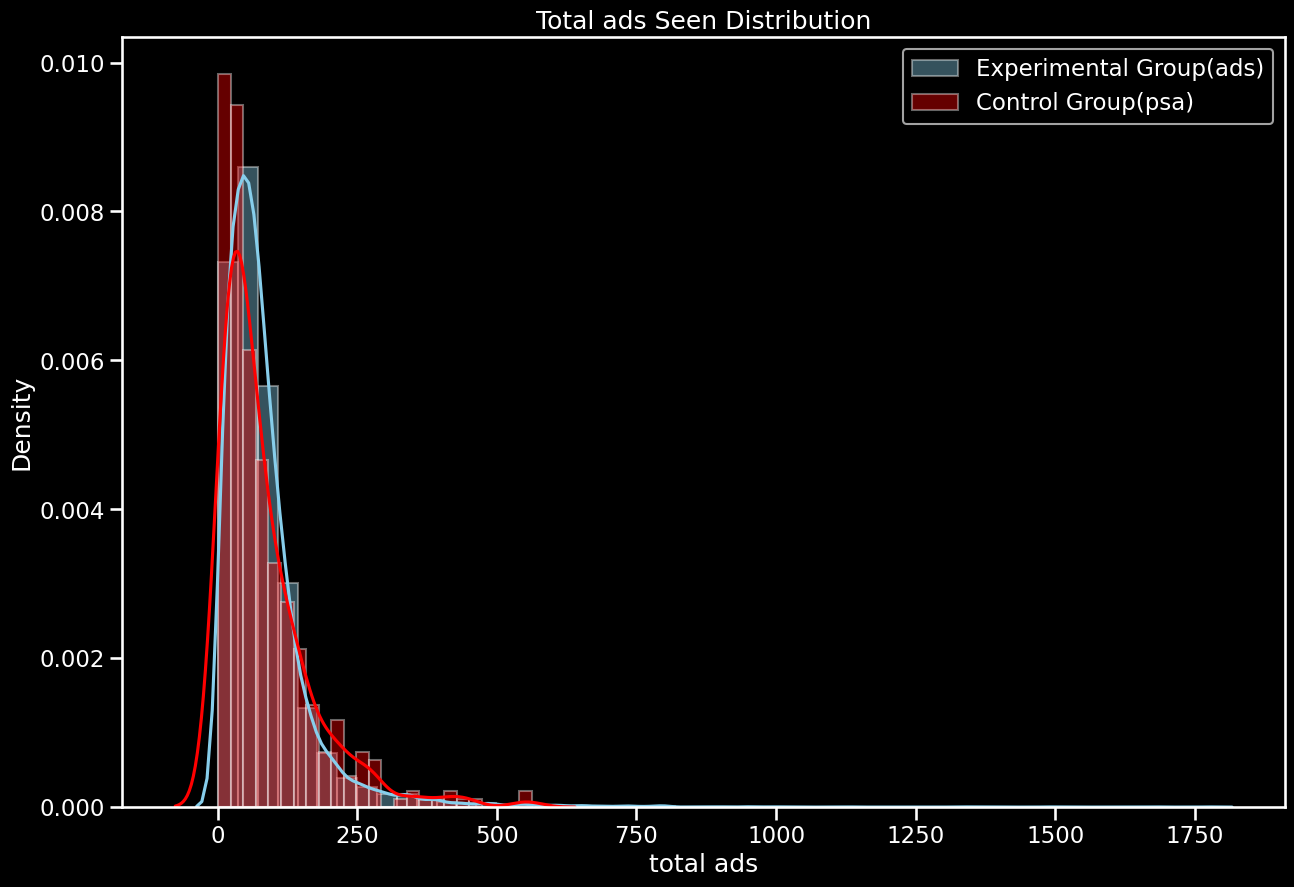

In [32]:
# Histogram and boxplot to check the distribution of the total add seen

sns.distplot(purchase_data_ad['total ads'],  color="skyblue", label="Experimental Group(ads)")
sns.distplot(purchase_data_psa['total ads'],  color="red", label="Control Group(psa)")
plt.title(f"Total ads Seen Distribution")
plt.legend()
plt.show()

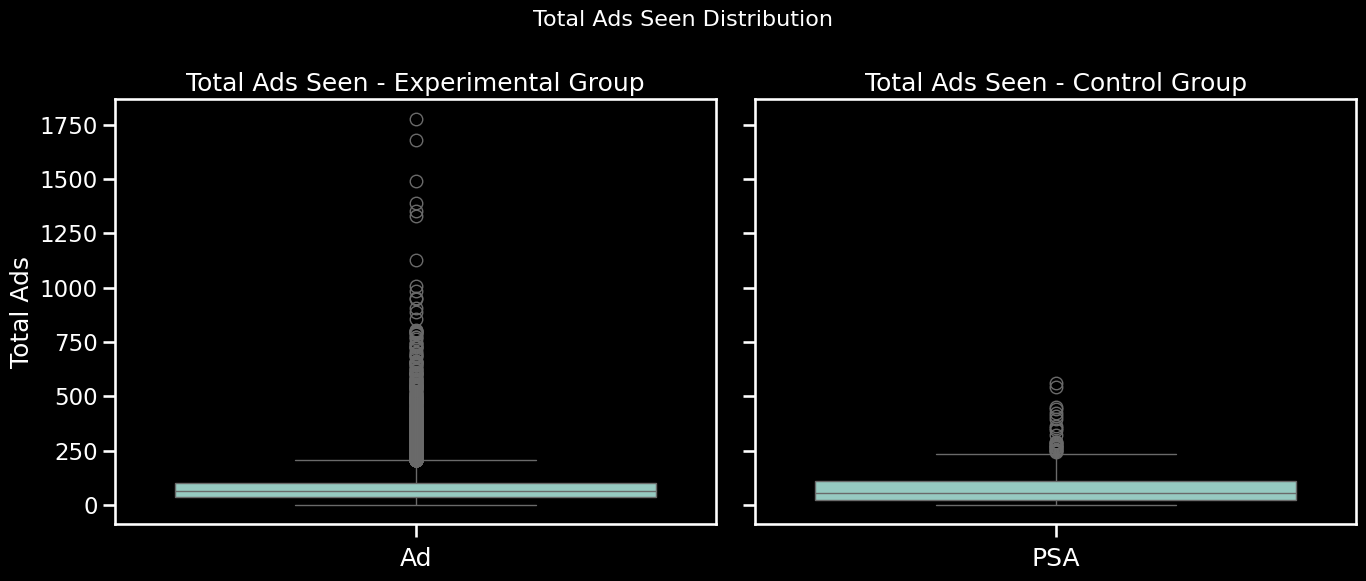

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for the 'ad' group
sns.boxplot(y=purchase_data_ad['total ads'], ax=axes[0])
axes[0].set_title("Total Ads Seen - Experimental Group")
axes[0].set_ylabel("Total Ads")
axes[0].set_xlabel("Ad")

# Plot for the 'psa' group
sns.boxplot(y=purchase_data_psa['total ads'], ax=axes[1])
axes[1].set_title("Total Ads Seen - Control Group")
axes[1].set_xlabel("PSA")

# Overall title for the figure
fig.suptitle("Total Ads Seen Distribution", fontsize=16)

plt.tight_layout()  # Adjust spacing
plt.show()

# Test of Normality

### Hypotheses:
- **$H_0$ (Null Hypothesis)**: Data is normally distributed.
- **$H_1$ (Alternative Hypothesis)**: Data is not normally distributed.

In [34]:
from scipy.stats import shapiro

In [35]:
a=0.05

ad_t, ad_p = shapiro(purchase_data_ad['total ads'])
psa_t, psa_p = shapiro(purchase_data_psa['total ads'])

print(f"For Experimental Group (ad):\nT stats: {ad_t} and P value: {ad_p}\n")
print(f"For Cpntrol Group (psa):\nT stats: {psa_t} and P value: {psa_p}\n")


if ad_p>a and psa_p>a:
  print(f"Both data distribution are normally distributed (ad_p>a and psa_p>a), so go to the test for homogeneity (levene) test and then Parametric test")
elif ad_p<a and psa_p>a:
  print(f"Data distribution for the Experimental (ad) group is not normally distributed (ad_p<a and psa_p>a), so go to Non-Parametric test")
elif ad_p>a and psa_p<a:
  print(f"Data distribution for the Control (psa) group is not normally distributed (ad_p>a and psa_p<a), so go to Non-Parametric test")
else:
  print(f"Both data are not normally distributed (ad_p<a and psa_p<a), go to Non-Parametric test")

For Experimental Group (ad):
T stats: 0.6537287804707439 and P value: 4.499334261406881e-98

For Cpntrol Group (psa):
T stats: 0.7826253095667592 and P value: 3.0320656591121925e-23

Both data are not normally distributed (ad_p<a and psa_p<a), go to Non-Parametric test


In [36]:
from scipy.stats import mannwhitneyu

In [37]:
u_value, p_value = mannwhitneyu(purchase_data_ad['total ads'], purchase_data_psa['total ads'])

print(f"Mann Whiteney U Stats: {u_value} and P Value: {p_value}\n")

a=0.05

if p<a:
  print(f"Reject the null hypothesis Ho as (p<0.05), There is a significant difference the between difference of ad seen rate between the experimental and the control group")
else:
  print(f"Fail to reject the null hypothesis H1 as (p>0.05), There is no relationship between the difference of ad seen rate between the experimental and the control group")

Mann Whiteney U Stats: 3214709.0 and P Value: 0.03176570677836976

Reject the null hypothesis Ho as (p<0.05), There is a significant difference the between difference of ad seen rate between the experimental and the control group


# Summary of Findings

## 1. Were the ads successful?
Based on the A/B test results for the purchase rate, the ads were indeed successful. The **purchase rate for the experimental group** (users who saw the ads) was **2.55%**, compared to **1.79%** for the control group (users who saw the PSA). The **actual difference in purchase rate** between the experimental and control group was **0.76%**, demonstrating a higher conversion rate for users exposed to the ads.

Additionally, the calculated **lift** was **43.09%**, indicating a substantial increase in the purchase rate attributed to the ad exposure.

## 2. Potential revenue generated from the ads
The **increase in the purchase rate** (0.76%) and the lift of **43.09%** suggest that the ad campaign had a significant positive impact on user purchases. This implies that the company can potentially generate higher revenue due to the increased conversion rates when users are exposed to the ads. The exact revenue potential would depend on the average value per purchase and the total user base impacted by the ad campaign.

## 3. Statistical significance of the observed differences
- **Purchase Rate Analysis**:
  - **T-statistics**: 7.370
  - **P-value**: 1.70e-13

  The p-value is significantly less than 0.05, leading to the rejection of the null hypothesis. This confirms that the observed difference in the purchase rate between the experimental and control groups is statistically significant.

- **Total Ads Seen Analysis**:
  - **Average Ads Seen for Experimental Group**: 83.91
  - **Average Ads Seen for Control Group**: 83.28
  - **Actual Difference**: 0.63
  - **Mann-Whitney U Statistics**: 3,214,709.0
  - **P-value**: 0.0318

  The p-value is also below 0.05, allowing us to reject the null hypothesis for the difference in ads seen. This indicates that there is a statistically significant difference in the total ads seen between the experimental and control groups.

## Conclusion
The findings show that the ad campaign was successful in increasing the purchase rate, and the differences between the experimental and control groups were statistically significant for both purchase rate and total ads seen. This suggests that the ads had a measurable and positive impact on user behavior and potential revenue generation.